# KO
Coca Cola is a popular soft drink brand that has been around for over a century. 

It was created in 1886 by John Stith Pemberton, a pharmacist in Atlanta, Georgia. The drink was originally marketed as a tonic for various ailments and was sold at soda fountains. 

Over the years, Coca Cola has evolved into one of the most recognized and consumed beverages in the world.

## Settings

In [1]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
ticker = 'KO'
facts = get_facts(ticker=ticker)

## Income

Significant drop in 2017 net income was the first thing that caught my attention. But it seems like the company has recovered well since then.

Coca Cola is not a fast-growing company, so you should not expect same growth rates as you would with a tech company such as Tesla.

In [3]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2020-12-31,7747000000,2020
14,2021-12-31,9771000000,2021
15,2022-12-31,9542000000,2022
16,2023-12-31,10714000000,2023
17,2024-12-31,10631000000,2024


## Income Growth (%)

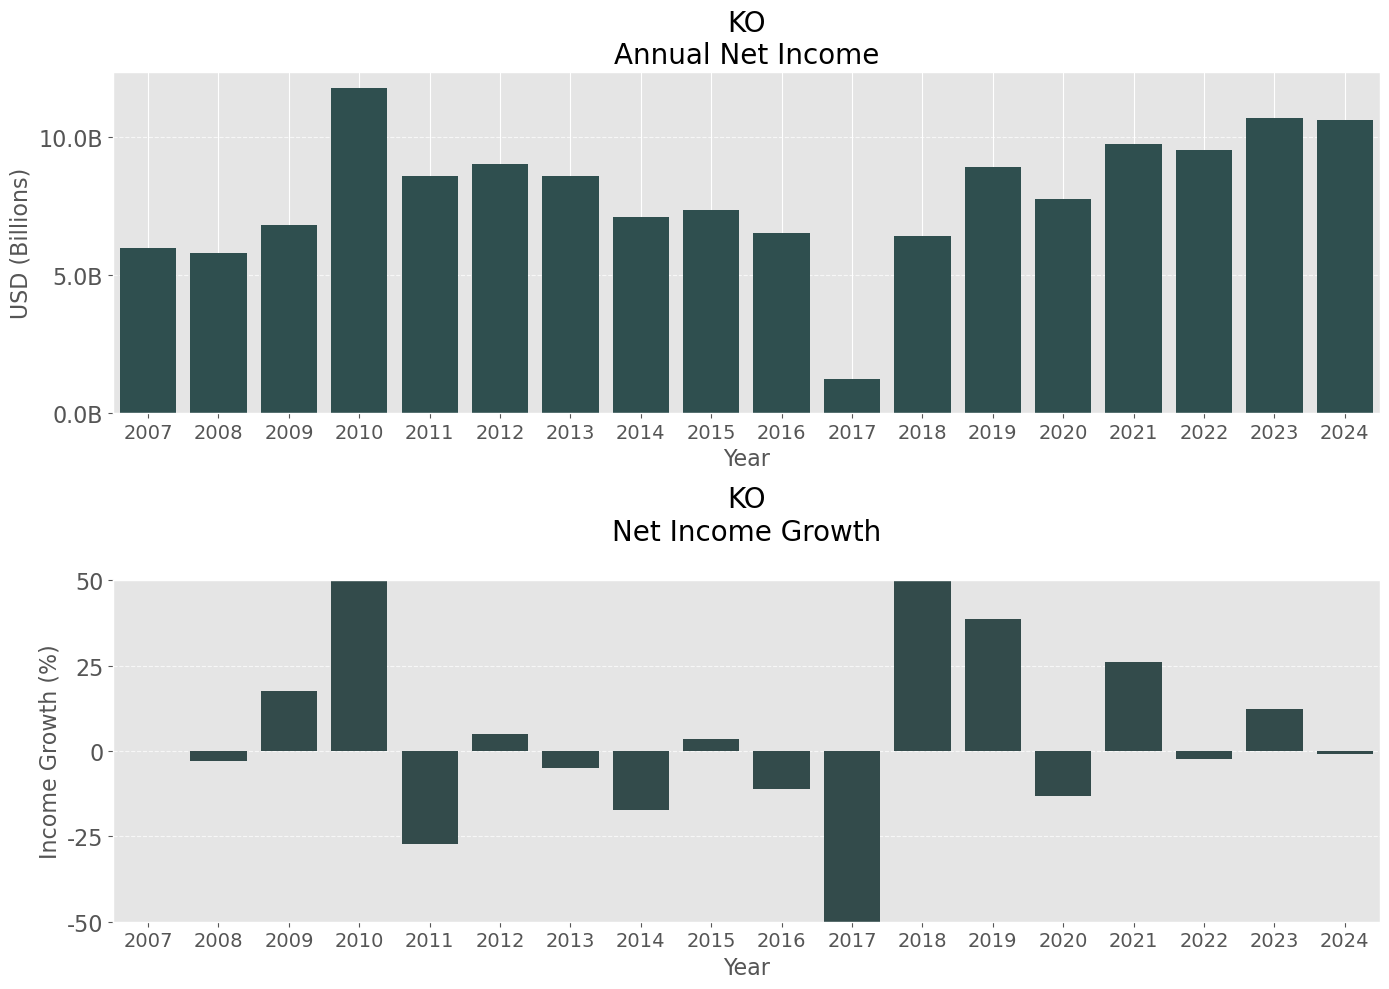

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

> The unusually low net income for Coca-Cola (ticker: KO) in 2017 was primarily due to significant structural changes within the company, notably the refranchising of its bottling operations. This strategic shift involved transferring ownership of bottling territories to independent bottlers, leading to a substantial reduction in reported revenues and net income for that year.
> 
> In 2017, Coca-Cola's net income attributable to shareowners dropped to approximately $1.2 billion, a significant decline from $6.5 billion in 2016. This decrease was largely attributed to the refranchising efforts, which, while reducing the company's direct revenues, were aimed at creating a more capital-light and efficient business model. The refranchising led to a 15% decline in net revenues for the year, primarily due to the structural headwinds from these changes. citeturn0search1
> 
> These structural changes were strategic moves to streamline operations and focus on core competencies, even though they had a short-term negative impact on financial metrics like net income. Therefore, the dip in net income for 2017 reflects these deliberate strategic decisions rather than operational underperformance.
>
> **created by chatGPT**

## Price

The price of Coca Cola stock has been relatively stable over the years. It has grown over 300% since 2008, which is a decent return for a company of this size. 

20 dollars in 2008 would be worth 60 dollars today. That's a 7% annual return, which is not bad for a company that is not known for its growth and it will be more if you include dividends.

More importantly, the stock price has been stable and has not seen any major fluctuations.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


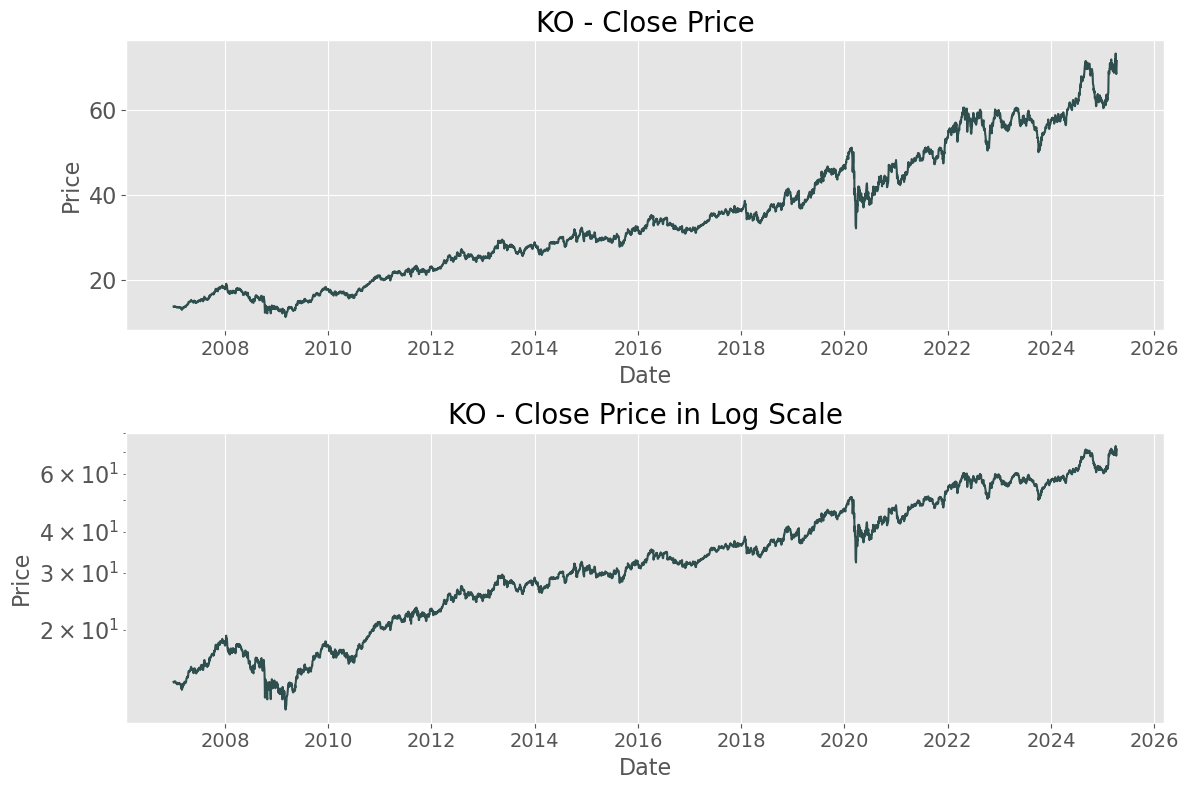

In [7]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

Coca Cola is known for its dividends. The company has a long history of paying dividends to its shareholders, and it has consistently increased its dividend payments over the years. From 2007, the company has increased its dividend payments every year.

In [8]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
13,2020-12-31,7047000000,2020
14,2021-12-31,7252000000,2021
15,2022-12-31,7616000000,2022
16,2023-12-31,7952000000,2023
17,2024-12-31,8359000000,2024


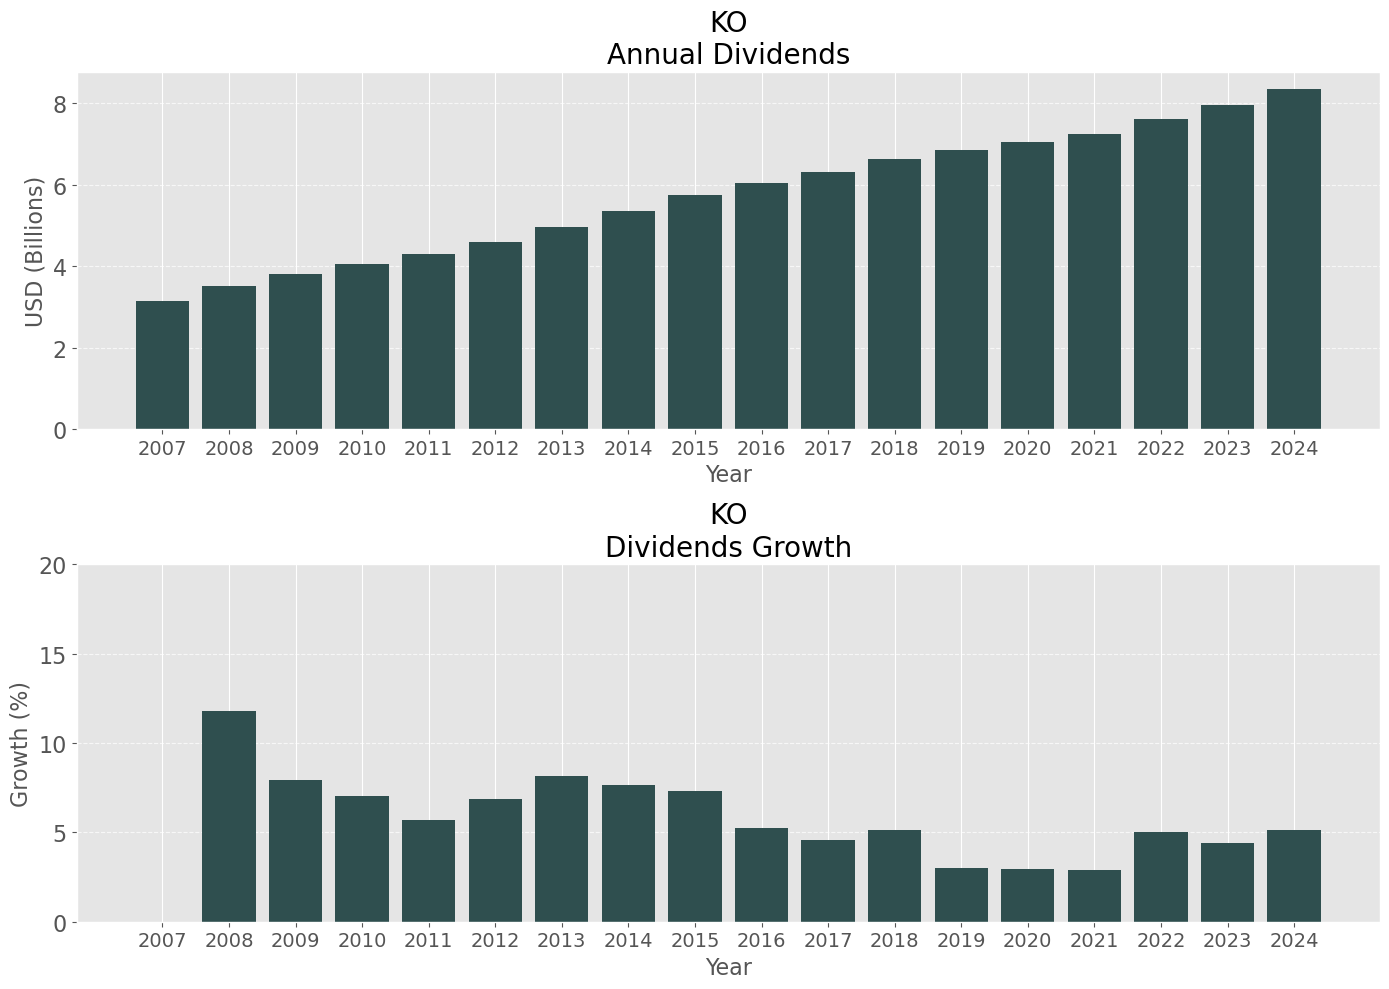

In [11]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=0, ymax=20, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E Ratio soared over 100 in 2017, which was due to the significant drop in net income. Other than that, the P/E ratio has been relatively stable over the years between 20 and 30.

In [35]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for KO: 28.92


[*********************100%***********************]  1 of 1 completed


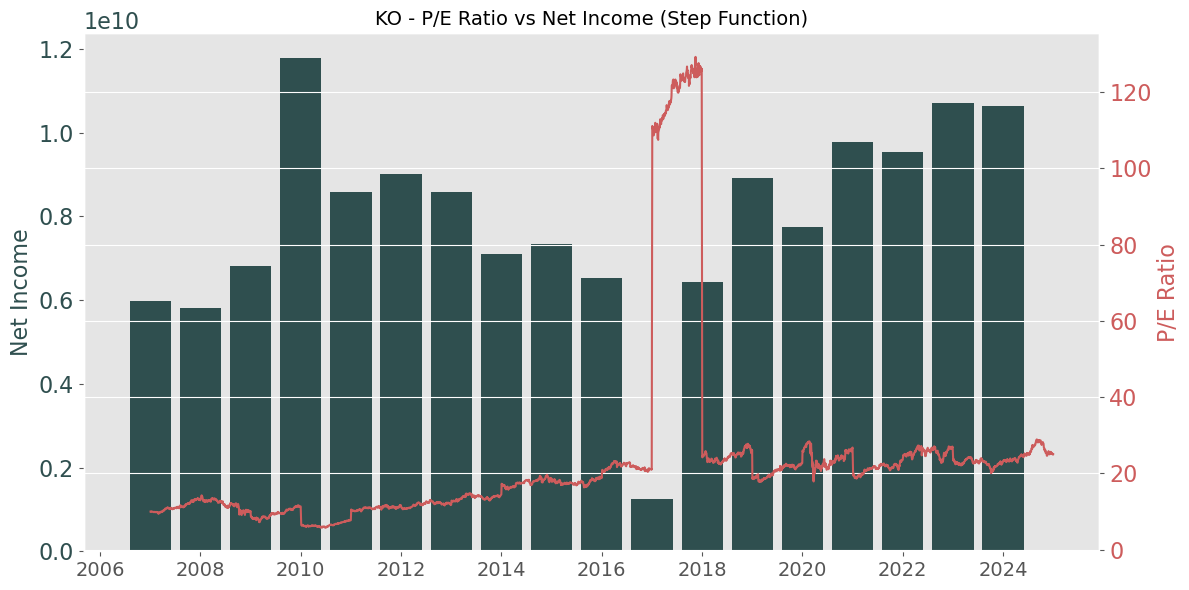

In [12]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion
**HOLD**

Coca Cola is a solid investment for those looking for a stable company with a long history of paying dividends.

The company has a strong brand and a loyal customer base, which makes it a good choice for long-term investors.

The stock price has been stable over the years, and the company has consistently increased its dividend payments. The P/E ratio has been relatively stable as well.


I already own Coca Cola stocks, it's good so I will keep them. But that doesn't mean I will buy more. Current P/E ratio is 28.92, which is a bit high for my taste. 

Of course, Coca Cola is a kind of stock that will pay you in the long term and doesn't really fluctuate much.